In [180]:
import numpy as np
import matplotlib.pyplot as plt
from utils_pipeline import ErrorMetrics, getPSNR
from PIL import Image
import os
import zipfile

In [181]:
# Load the .npz file
data = np.load('brain_kband2d_Rv4_Rb4_train_kspace_L1.npz')

In [182]:
for k in data: print(k)

ground_truth
reconstruction
masks
inputs


In [183]:
gt = data["ground_truth"]
recon = data["reconstruction"]
masks = data["masks"]
inputs = data["inputs"]
errs = np.abs(gt - np.abs(recon))

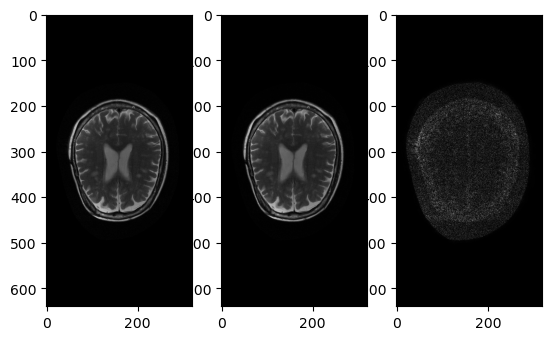

In [184]:
plt.subplot(1,3,1)
plt.imshow(gt[100], cmap="gray")

plt.subplot(1,3,2)
plt.imshow(np.abs(recon[100]), cmap="gray")

plt.subplot(1,3,3)
plt.imshow(errs[100], cmap="gray")


In [185]:
SSIM_array = []
NMSE_array = []
PSNR_array = []


for i in range(400):
    c = ErrorMetrics(gt[i], recon[i])
    c.calc_SSIM()
    c.calc_NMSE()
    SSIM_array.append(c.SSIM)
    NMSE_array.append(c.NMSE)
    PSNR_array.append(getPSNR(abs(gt[i]),  np.abs(recon[i])))
    # if True:
    #     print(
    #         f"Sample {i}: SSIM: {SSIM_array[-1]} NMSE: {NMSE_array[-1]} PSNR: {PSNR_array[-1]}"
    #     )


No module named 'pyopencl'
No module named 'pyopencl'
No module named 'pyopencl'
No module named 'pyopencl'
No module named 'pyopencl'
No module named 'pyopencl'
No module named 'pyopencl'
No module named 'pyopencl'
No module named 'pyopencl'
No module named 'pyopencl'
No module named 'pyopencl'
No module named 'pyopencl'
No module named 'pyopencl'
No module named 'pyopencl'
No module named 'pyopencl'
No module named 'pyopencl'
No module named 'pyopencl'
No module named 'pyopencl'
No module named 'pyopencl'
No module named 'pyopencl'
No module named 'pyopencl'
No module named 'pyopencl'
No module named 'pyopencl'
No module named 'pyopencl'
No module named 'pyopencl'
No module named 'pyopencl'
No module named 'pyopencl'
No module named 'pyopencl'
No module named 'pyopencl'
No module named 'pyopencl'
No module named 'pyopencl'
No module named 'pyopencl'
No module named 'pyopencl'
No module named 'pyopencl'
No module named 'pyopencl'
No module named 'pyopencl'
No module named 'pyopencl'
N

In [186]:

print("Statistics:")
print("NMSE")
# Convert to string to avoid floating point rounding errors.
print(
    f"{str(round(np.mean(NMSE_array), 6))[:8]} ± {str(round(np.std(NMSE_array), 6))[:8]}"
)

print("SSIM")
print(f"{round(np.mean(SSIM_array), 4)} ± {round(np.std(SSIM_array), 4)}")

print("PSNR")
print(f"{round(np.mean(PSNR_array), 4)} ± {round(np.std(PSNR_array), 4)}")


Statistics:
NMSE
9.2e-05 ± 3.4e-05
SSIM
0.9826 ± 0.0054
PSNR
44.3091 ± 2.5159


In [187]:
# Create directories if they don't exist
os.makedirs('concatenated_images', exist_ok=True)
os.makedirs('error_images', exist_ok=True)

# Loop over the arrays and concatenate images
for i, (recon_img, gt_img, err_img) in enumerate(zip(recon, gt, errs), start=1):
    # Concatenate the ground truth and reconstruction images horizontally
    concatenated_img = np.concatenate((gt_img, np.abs(recon_img)), axis=1)
    
    # Save concatenated image in concatenated_images folder
    plt.imsave(f'concatenated_images/{i}.png', concatenated_img, cmap='gray')

    # Save error image in error_images folder
    plt.imsave(f'error_images/{i}.png', err_img, cmap='gray')

    print(f'Saved concatenated image {i}.png and error image {i}.png')

zip_filename = 'inference.zip'
with zipfile.ZipFile(zip_filename, 'w') as zipf:
    for folder in ['concatenated_images', 'error_images']:
        for root, dirs, files in os.walk(folder):
            for file in files:
                file_path = os.path.join(root, file)
                arcname = os.path.relpath(file_path, start=folder)  # Get the relative path within the folder
                zipf.write(file_path, arcname=arcname)

print(f'ZIP file created: {zip_filename}')

print(f'Images zipped successfully. Zip file created: {zip_filename}')

Saved concatenated image 1.png and error image 1.png
Saved concatenated image 2.png and error image 2.png
Saved concatenated image 3.png and error image 3.png
Saved concatenated image 4.png and error image 4.png
Saved concatenated image 5.png and error image 5.png
Saved concatenated image 6.png and error image 6.png
Saved concatenated image 7.png and error image 7.png
Saved concatenated image 8.png and error image 8.png
Saved concatenated image 9.png and error image 9.png
Saved concatenated image 10.png and error image 10.png
Saved concatenated image 11.png and error image 11.png
Saved concatenated image 12.png and error image 12.png
Saved concatenated image 13.png and error image 13.png
Saved concatenated image 14.png and error image 14.png
Saved concatenated image 15.png and error image 15.png
Saved concatenated image 16.png and error image 16.png
Saved concatenated image 17.png and error image 17.png
Saved concatenated image 18.png and error image 18.png
Saved concatenated image 19.

/home/orel/anaconda3/envs/kband_orel/lib/python3.8/zipfile.py:1517: UserWarning: Duplicate name: '388.png'
  return self._open_to_write(zinfo, force_zip64=force_zip64)
/home/orel/anaconda3/envs/kband_orel/lib/python3.8/zipfile.py:1517: UserWarning: Duplicate name: '216.png'
  return self._open_to_write(zinfo, force_zip64=force_zip64)
/home/orel/anaconda3/envs/kband_orel/lib/python3.8/zipfile.py:1517: UserWarning: Duplicate name: '170.png'
  return self._open_to_write(zinfo, force_zip64=force_zip64)
/home/orel/anaconda3/envs/kband_orel/lib/python3.8/zipfile.py:1517: UserWarning: Duplicate name: '314.png'
  return self._open_to_write(zinfo, force_zip64=force_zip64)
/home/orel/anaconda3/envs/kband_orel/lib/python3.8/zipfile.py:1517: UserWarning: Duplicate name: '263.png'
  return self._open_to_write(zinfo, force_zip64=force_zip64)
/home/orel/anaconda3/envs/kband_orel/lib/python3.8/zipfile.py:1517: UserWarning: Duplicate name: '393.png'
  return self._open_to_write(zinfo, force_zip64=force